# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





The symbolic integration of f(x) is:  320

approximantion result : 
325.000000
321.250000
320.312500
320.078125
320.019531
320.004883
320.001221
320.000305


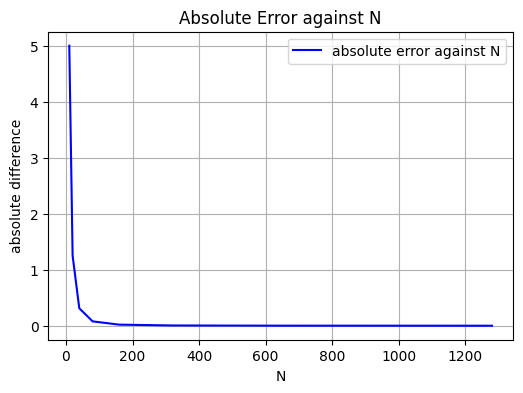

In [253]:
import sympy as sp
import matplotlib.pyplot as plt
x = sp.Symbol('x')                                              # Create a new symbol x
f = 3*x**2 + 2*x + 2                                            # Set f(x), lower bound and upper bound
lower = -4 
upper = 6

integral = sp.integrate(f,(x, lower, upper))                    # Set integral of f with two bound
print("The symbolic integration of f(x) is: ", integral)        # Print out the value of the integral of f

def trapezoi_rule_scheme(function, a, b, n):                    # Define the function: trapezoi_rule_scheme
    x_0 = a                                                         # Set X_0 = a as the start point
    delta_x = (b - a)/n                                             # Set delta_x
    k = sp.Symbol("k")                                              # Create a new symbol k

    #Use the trapezoi_rule_scheme formular to get a approximation value
    result = delta_x * (sp.Sum(function.subs(x, x_0 + k*delta_x), (k, 1, n-1)) + (function.subs(x,b)+function.subs(x,a))/2)
    return result                                                   # return the approximation value


N = [10,20,40,80,160,320,640,1280]                              # Use the given value for N
approximantion = []                                             # 
absolute_error = []
for i in range(0, len(N)):                                      # Loop though N = 10 ... 1200
    t = trapezoi_rule_scheme(f, lower, upper, N[i])             # Call trapezoi_rule_scheme to get the approxmation result
    approximantion.append(t)                                    # Collect the result into "approxmation"
    absolute_error.append(abs(integral - t))                    # Collect the absolut difference between integation and its approxmation

print("\napproximantion result : ")                             # Print out all the approximantion result
for error in approximantion:
    print(f"{error:.6f}")

#print("\nOutput the difference : ")                            # Print out all the difference
#for error in absolute_error:
    #print(f"{error:.6f}")


plt.figure(figsize=(6, 4))                                      # Plot the function in 6*4 figure
plt.plot(N, absolute_error, label='absolute error against N', color='blue')
plt.xlabel('N')
plt.ylabel('absolute difference')
plt.legend()
plt.title('Absolute Error against N')
plt.grid(True)
plt.show()   



## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [254]:
import numpy as np
import pandas as pd
population = pd.Series(['Population in 2099', 'Population in 2300', 'Population in 2400'])
town_names = pd.Series(['Hempsterad', 'Babylon', 'Islip', 'Brookhaven'])

# 1.
random_data = np.random.randint(1000, 10000, size=(3, 4))                           # Create a 3_by_4 pandas DataFrame with random integers from 1000 to 10000
myDF = pd.DataFrame(data = random_data, index = population, columns = town_names)   # Set "population" as the index column, different towns to name each column 
print(myDF)                                                                         # Display the entire DataFrame

# 2.
value = myDF.loc['Population in 2300', 'Hempsterad']                                # Find the value in the cell of row #1 under the Hempstead column
print('\n The value of row #1 in Hempstead is: ', value)                            # Print the value

# 3.
myDF["Riverhead"] = myDF["Islip"] + myDF["Brookhaven"]                              # Add a new column, "Riverhead" (sum of row values from the Islip and Brookhaven)
myDF                                                                                # Display

                    Hempsterad  Babylon  Islip  Brookhaven
Population in 2099        2207     7172   9994        8221
Population in 2300        7021     4622   4560        9948
Population in 2400        2641     5984   5353        9622

 The value of row #1 in Hempstead is:  7021


,Hempsterad,Babylon,Islip,Brookhaven,Riverhead
Population in 2099,2207,7172,9994,8221,18215
Population in 2300,7021,4622,4560,9948,14508
Population in 2400,2641,5984,5353,9622,14975


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [255]:
# 0.
df = pd.read_csv(r"C:\Users\Xiaoyong\Desktop\customers-100.csv")    # Read the csv file on my laptop
#df = pd.read_csv('https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv')

# 1.
df.sort_values('Last Name').head()                                  # Display the first few row of sorted data (based on last name)


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
67,68,a014Ec1b9FccC1E,Tom,Alvarado,Donaldson-Dougherty,South Sophiaberg,Kiribati,(585)606-2980x2258,730-797-3594x5614,nicholsonnina@montgomery.info,2020-08-18,http://odom-massey.com/
96,97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
92,93,aAb6AFc7AfD0fF3,Collin,Ayers,Lamb-Peterson,South Lonnie,Anguilla,404-645-5351x012,001-257-582-8850x8516,dudleyemily@gonzales.biz,2021-06-29,http://www.ruiz.com/
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
15,16,8cad0b4CBceaeec,Miranda,Beasley,Singleton and Sons,Desireeshire,Oman,540.085.3135x185,+1-600-462-6432x21881,vduncan@parks-hardy.com,2022-04-12,http://acosta.org/


In [256]:
# 2.
df[(df['Subscription Date'] > '2021-01-01') & (df['Subscription Date']< '2021-12-31')]  # Count the number of customers whose subscription date is in 2021
print('The number of customers in 2021 is:  ', df.shape[0])                             # Print the number of customers

The number of customers in 2021 is:   100


## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


Fact: LU and PLU decompositions are not unique.

In [261]:
# Part A
import numpy as np
# 1.
def LUdecomposition(A):                                         # define a function LUdecomposition(A)
    n = len(A)                                                      # Set value for n (Matrix_A I choose is 3 by 3, so n=3)
    L = np.zeros((n, n))                                            # initialize a n_by_n
    U = np.copy(A)                                                  # U start from A to do some operation
    for i in range(n):                                              # Loop through the column
# 2.
        if A[i, i] == 0:                                            # Check the error and raise exception
            raise Exception("Sorry,theLU does not exist for A!!!")
        L[i, i] = 1                                                     # let the diagnoal of L be 1
        for j in range(i+1, n):                                         # Loop through the row
            coefficient = U[j, i]/ U[i, i]                              # Find the coefficient from U
            L[j, i] = coefficient                                       # copy the coefficient into L
            U[j, i:] = U[j, i:] - coefficient * U[i, i:]                # Use the coefficient to do gauss elimination for U
    return L, U                                                     # Return L and U

# 3.
A = np.random.rand(3, 3)                                        # Define Matrix A with 3 by 3 random number
L, U = LUdecomposition(A)                                       # Call LUdecomposition(A) to get L and U
LU_approx = np.matmul(L, U)                                     # Perform the matrix multiplication between L and U

is_close = np.allclose(A, LU_approx, atol = 1e-10)              # boolean function to test the difference between A and LU,  return true/false

                                                                # Display:
print("\nMatrix A = \n", A)                                         # Print out the Matrix A
print("\nMatrix L = \n", L)                                         # Print out the Matrix L
print("\nMatrix U = \n", U)                                         # Print out the Matrix U
print("\nMatrix LU = \n", LU_approx)                                # Print out the Matrix LU

print("\nThe original A and LU are close:", is_close)               # Print out whether A and LU are close or not


Matrix A = 
 [[0.26455561 0.77423369 0.45615033]
 [0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]]

Matrix L = 
 [[1.         0.         0.        ]
 [2.14863689 1.         0.        ]
 [2.31367506 0.71402097 1.        ]]

Matrix U = 
 [[ 0.26455561  0.77423369  0.45615033]
 [ 0.         -1.64475727 -0.36246594]
 [ 0.          0.          0.14717271]]

Matrix LU = 
 [[0.26455561 0.77423369 0.45615033]
 [0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]]

The original A and LU are close: True


In [262]:
# Part B: PLU
def pivoting(A):                                        # define a function pivoting(A)
    n = len(A)                                              # Set value for n (n=3)
    P = np.identity(n)                                      # Set Matrix P as identity Matrix

    for c in range(n):                                      # Loop through c from 1 to n
        r = np.argmax(np.abs(A[c:,c])) + c                      # Find the index of maximum value from current column

        if c != r:                                              # if c doesn't match r
            A[[c, r], :] = A[[r, c], :]                         # Swap the rows of A
            P[[c, r], :] = P[[r, c], :]                         # Swap the rows of P as well
    return P                                                # Return P

P = pivoting(A)                                         # Call pivoting(A) to compute the Permutation Matrix P
PA =np.dot(P, A)                                        # Compute PA = P * A

L, U = LUdecomposition(PA)                              # Call LUdecomposition(PA) to get L and U
LU_approx1 = np.matmul(L, U)                            # Perform the matrix multiplication between L and U

is_close = np.allclose(PA, LU_approx1, atol = 1e-10)    # boolean function to test the difference between PA and LU,  return true/false

                                                        # Display:
print("\nMatrix P = \n", P)                                 # Print out the Matrix P
print("\nMatrix PA = \n", PA)                               # Print out the Matrix PA
print("\nMatrix LU = \n", LU_approx1)                       # Print out the Matrix LU

print("\nPA is close to LU :", is_close)                    # Print out whether PA and LU are close or not



Matrix P = 
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Matrix PA = 
 [[0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]
 [0.26455561 0.77423369 0.45615033]]

Matrix LU = 
 [[0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]
 [0.26455561 0.77423369 0.45615033]]

PA is close to LU : True


## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [263]:
# 1.
import numpy as np
np.random.seed(0)                                                           # Fix the random seed to be the last digit of my ID: 0  (ID: 112496580)
P = np.random.rand(5,5)                                                     # Create a 5 by 5 matrix P
P_norm = P/np.linalg.norm(P, axis = 1, keepdims = True)                     # Normalize each row of P
print("\n After normalizing each row, \nP = \n", P_norm, "\n")              # Print out Matrix P, after normalizing each row

# 2.
vector_p = np.random.rand(5,1)                                              # Create a 5 by 1 vector p
norm_vector_p = vector_p/np.linalg.norm(vector_p, axis = 0,keepdims = 1)    # Normalize the vector p
print("\n After normalizling, \np = \n", norm_vector_p)                     # Print out normalized vector p

number_of_transition = 50                                                   # Apply the transition rule for 50 times to obtain p_50

new_vector_p = norm_vector_p
for i in range(1, number_of_transition):                                    # Loop through to apply the transition rule 50 times
    new_vector_p = np.dot(P_norm.T,new_vector_p)                            # New p = P.T * p
print("\n p_50 =\n", new_vector_p)                                          # Display p_50



 After normalizing each row, 
P = 
 [[0.42694075 0.55637021 0.4689102  0.42388322 0.32957552]
 [0.41017673 0.2778909  0.56632276 0.61197654 0.24350553]
 [0.54751561 0.36575605 0.3928299  0.6400942  0.04912482]
 [0.06065134 0.01407417 0.57959273 0.54168058 0.60562179]
 [0.62745791 0.5123942  0.29588539 0.50044965 0.07583367]] 


 After normalizling, 
p = 
 [[0.48144057]
 [0.10785095]
 [0.71071573]
 [0.39260931]
 [0.31196831]]

 p_50 =
 [[2.32469653e+14]
 [1.90932695e+14]
 [2.87325324e+14]
 [3.33592547e+14]
 [1.76058912e+14]]


In [264]:
# 3.
eigen_value, v = np.linalg.eig(P_norm.T)                                    # Find the eigenvalue and eigenvector for Normalized P
diff = 1                                                                    # Initialize "diff"
for i in range(0, 4):                                                       # Loop though to find the eigenvalue closest to 1
    if diff > abs(eigen_value[i] - 1):                                          # If diff is larger
        diff = abs(eigen_value[i] - 1)                                          # take the smallest abs(eigen_value[i] - 1)
        index = i                                                               # collect the index
print("The eigenvalue closest to 1 is :", eigen_value[index])               # Print out the eigenvalue
print("The corresponding eigenvector is :\n",v[index],"\n")                 # Print out the corresponding eigenvector

# 4.
stationary_dist = v[index]                                                  # Define stationary_dist
p_50 = new_vector_p                                                         
difference = np.abs(p_50 - stationary_dist)                                 # Get the difference between p_50 and stationary_dist
if np.all(difference <= 1e-5):                                              # Check whether they match with each other within 1e-5
    print("They match with each other within 1e-5")                             # Print out the result
else:
    print("Not match with each other within 1e-5")

The eigenvalue closest to 1 is : (0.10914033392876599+0.12667194319666011j)
The corresponding eigenvector is :
 [-0.51166829+0.j          0.36372914+0.j         -0.09800983-0.33330916j
 -0.09800983+0.33330916j -0.56646754+0.j        ] 

Not match with each other within 1e-5
